# Import Required Libraries
Import necessary libraries such as pandas, numpy, and matplotlib for data handling and analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Load Data from Kaggle and VNstock
Load the FPT stock data from both Kaggle and VNstock sources into pandas DataFrames.

In [12]:
# Load data from Kaggle
kaggle_path = 'data_kaggle/FPT.csv'
df_kaggle = pd.read_csv(kaggle_path)
print("Kaggle data shape:", df_kaggle.shape)
print("Kaggle columns:", df_kaggle.columns.tolist())

# Load data from VNstock
vnstock_path = 'data/FPT_detail_2013_01_01_2024_12_31.csv'
df_vnstock = pd.read_csv(vnstock_path)
print("VNstock data shape:", df_vnstock.shape)
print("VNstock columns:", df_vnstock.columns.tolist())

Kaggle data shape: (2706, 9)
Kaggle columns: ['Symbol', 'Value', 'TradingDate', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
VNstock data shape: (3133, 6)
VNstock columns: ['time', 'open', 'high', 'low', 'close', 'volume']


# Synchronize Column Names
Write functions to standardize and synchronize column names between the two datasets for consistency.

In [13]:
def synchronize_columns(df_kaggle, df_vnstock):
    # Mapping for Kaggle columns
    kaggle_mapping = {
        'TradingDate': 'date',
        'Open': 'open',
        'High': 'high',
        'Low': 'low',
        'Close': 'close',
        'Volume': 'volume'
    }
    df_kaggle_renamed = df_kaggle.rename(columns=kaggle_mapping)
    
    # VNstock columns are already in lowercase
    df_vnstock_renamed = df_vnstock.rename(columns={'time': 'date'})
    
    return df_kaggle_renamed, df_vnstock_renamed

df_kaggle_sync, df_vnstock_sync = synchronize_columns(df_kaggle, df_vnstock)
print("Synchronized Kaggle columns:", df_kaggle_sync.columns.tolist())
print("Synchronized VNstock columns:", df_vnstock_sync.columns.tolist())

Synchronized Kaggle columns: ['Symbol', 'Value', 'date', 'Time', 'open', 'high', 'low', 'close', 'volume']
Synchronized VNstock columns: ['date', 'open', 'high', 'low', 'close', 'volume']


# Filter Dissimilar Columns
Identify and filter out columns that do not match or are dissimilar between the two datasets.

In [14]:
def filter_common_columns(df1, df2):
    common_cols = set(df1.columns) & set(df2.columns)
    df1_filtered = df1[list(common_cols)]
    df2_filtered = df2[list(common_cols)]
    return df1_filtered, df2_filtered

df_kaggle_common, df_vnstock_common = filter_common_columns(df_kaggle_sync, df_vnstock_sync)
print("Common columns:", df_kaggle_common.columns.tolist())
print("Kaggle common shape:", df_kaggle_common.shape)
print("VNstock common shape:", df_vnstock_common.shape)

Common columns: ['low', 'close', 'open', 'volume', 'high', 'date']
Kaggle common shape: (2706, 6)
VNstock common shape: (3133, 6)


# Analyze Data
Perform basic data analysis such as descriptive statistics, data types, and missing values for both datasets.

In [8]:
def analyze_data(df, name):
    print(f"\n--- Analysis for {name} ---")
    print("Data types:")
    print(df.dtypes)
    print("\nDescriptive statistics:")
    print(df.describe())
    print("\nMissing values:")
    print(df.isnull().sum())

In [15]:
analyze_data(df_kaggle_common, "Kaggle")


--- Analysis for Kaggle ---
Data types:
low        int64
close      int64
open       int64
volume     int64
high       int64
date      object
dtype: object

Descriptive statistics:
                 low          close          open        volume           high
count    2706.000000    2706.000000    2706.00000  2.706000e+03    2706.000000
mean    56850.461936   57446.526238   57422.96748  1.235729e+06   58046.304508
std     17466.725079   17699.925931   17722.25785  1.041875e+06   17989.604033
min         0.000000   35700.000000       0.00000  0.000000e+00       0.000000
25%     45100.000000   45500.000000   45500.00000  5.120275e+05   45900.000000
50%     48600.000000   48900.000000   49000.00000  9.528050e+05   49400.000000
75%     62300.000000   63300.000000   63500.00000  1.671092e+06   64500.000000
max    115200.000000  116600.000000  116500.00000  1.369700e+07  118900.000000

Missing values:
low       0
close     0
open      0
volume    0
high      0
date      0
dtype: int64


In [16]:
analyze_data(df_vnstock_common, "VNstock")


--- Analysis for VNstock ---
Data types:
low       float64
close     float64
open      float64
volume      int64
high      float64
date       object
dtype: object

Descriptive statistics:
               low        close         open        volume         high
count  3133.000000  3133.000000  3133.000000  3.133000e+03  3133.000000
mean     27.678899    27.969154    27.955538  1.441355e+06    28.257395
std      28.344768    28.646037    28.619325  1.438846e+06    28.922419
min       3.530000     3.570000     3.540000  0.000000e+00     3.600000
25%       8.320000     8.390000     8.390000  5.050200e+05     8.470000
50%      14.630000    14.770000    14.800000  1.030570e+06    15.000000
75%      46.940000    47.430000    47.440000  1.934400e+06    47.870000
max     129.680000   131.490000   130.970000  1.372370e+07   132.690000

Missing values:
low       0
close     0
open      0
volume    0
high      0
date      0
dtype: int64


# Compare Similarity
Compare the similarity of the datasets by calculating correlations, differences in values, and visualizing overlaps.

C:\Users\Admin\AppData\Local\Temp\ipykernel_14492\1415320789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'], errors='coerce')


Overlapping dates: 725
Sample merged data:
        date  close_kaggle  close_vnstock
0 2013-02-01         36400           4.48
1 2013-03-01         35900           4.20
2 2013-04-01         36400           4.36
3 2013-07-01         36200           4.76
4 2013-08-01         38000           4.87
Correlation for open: 0.8599
Correlation for high: 0.8588
Correlation for low: 0.8609
Correlation for close: 0.8596
Correlation for volume: 0.3328


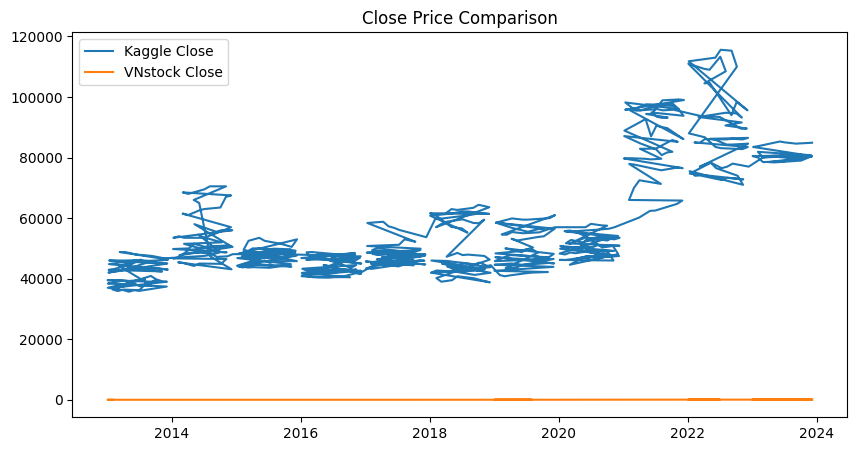

In [19]:
def compare_similarity(df1, df2, name1, name2):
    # Convert date columns to datetime
    df1['date'] = pd.to_datetime(df1['date'], errors='coerce')
    df2['date'] = pd.to_datetime(df2['date'], errors='coerce')
    
    # Filter to common date range, e.g., from 2013
    start_date = '2013-01-01'
    df1_filtered = df1[df1['date'] >= start_date].copy()
    df2_filtered = df2[df2['date'] >= start_date].copy()
    
    # Merge on date
    merged = pd.merge(df1_filtered, df2_filtered, on='date', suffixes=('_kaggle', '_vnstock'))
    
    if merged.empty:
        print("No overlapping dates found.")
        return
    
    print(f"Overlapping dates: {len(merged)}")
    
    # Print sample
    print("Sample merged data:")
    print(merged[['date', 'close_kaggle', 'close_vnstock']].head(5))
    
    # Calculate correlations for numeric columns
    numeric_cols = ['open', 'high', 'low', 'close', 'volume']
    for col in numeric_cols:
        if f'{col}_kaggle' in merged.columns and f'{col}_vnstock' in merged.columns:
            corr = merged[f'{col}_kaggle'].corr(merged[f'{col}_vnstock'])
            print(f"Correlation for {col}: {corr:.4f}")
    
    # Plot close prices
    plt.figure(figsize=(10, 5))
    plt.plot(merged['date'], merged['close_kaggle'], label=f'{name1} Close')
    plt.plot(merged['date'], merged['close_vnstock'], label=f'{name2} Close')
    plt.legend()
    plt.title('Close Price Comparison')
    plt.show()

compare_similarity(df_kaggle_common, df_vnstock_common, "Kaggle", "VNstock")

After scaling VNstock prices by 1000:
Overlapping dates: 725
Correlation for open: 0.8599
Correlation for high: 0.8588
Correlation for low: 0.8609
Correlation for close: 0.8596
Correlation for volume: 0.3328


C:\Users\Admin\AppData\Local\Temp\ipykernel_14492\2424627256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'], errors='coerce')


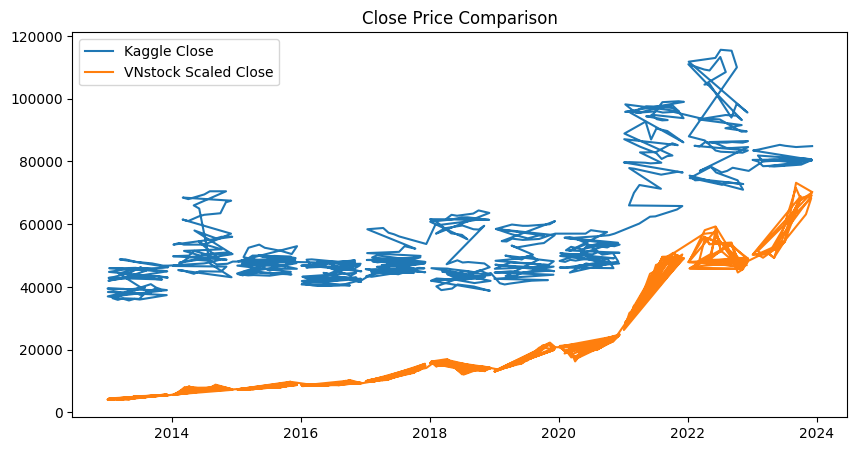

In [18]:
# Scale VNstock prices by 1000 to match Kaggle units
df_vnstock_scaled = df_vnstock_common.copy()
price_cols = ['open', 'high', 'low', 'close']
df_vnstock_scaled[price_cols] = df_vnstock_scaled[price_cols] * 1000

print("After scaling VNstock prices by 1000:")
compare_similarity(df_kaggle_common, df_vnstock_scaled, "Kaggle", "VNstock Scaled")

In [ ]:
# Print sample of merged data to see differences
print("Sample merged data:")
print(merged.head(10))